In [ ]:
import pandas as pd
file="/content/Air_Quality.csv"
df=pd.read_csv(file)
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unique ID      18025 non-null  int64  
 1   Indicator ID   18025 non-null  int64  
 2   Name           18025 non-null  object 
 3   Measure        18025 non-null  object 
 4   Measure Info   18025 non-null  object 
 5   Geo Type Name  18025 non-null  object 
 6   Geo Join ID    18016 non-null  float64
 7   Place          18016 non-null  object 
 8   Time Period    18025 non-null  object 
 9   Start_Date     18025 non-null  object 
 10  Data Value     18025 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.5+ MB


,Unique ID,Indicator ID,Geo Join ID,Data Value
count,18025.000000,18025.000000,1.801600e+04,18025.000000
mean,426387.692705,434.830180,5.906303e+05,21.428616
std,250489.450630,115.852371,7.769549e+06,23.999345
min,121644.000000,365.000000,1.000000e+00,0.000000
25%,175303.000000,365.000000,2.020000e+02,8.900000
50%,410803.000000,375.000000,3.030000e+02,15.200000
75%,649893.000000,386.000000,4.040000e+02,26.700000
max,828353.000000,661.000000,1.051061e+08,424.700000


In [ ]:
if 'Place' in df.columns:
  group_data=df.groupby('Place')
  for place,group in group_data:
    print(place)
    print(group)

Streaming output truncated to the last 5000 lines.
17805     213250           375                Nitrogen dioxide (NO2)   
17806     603016           375                Nitrogen dioxide (NO2)   
17993     154528           644  Annual vehicle miles traveled (cars)   

             Measure     Measure Info Geo Type Name  Geo Join ID  \
167             Mean           mcg/m3            CD        304.0   
168             Mean           mcg/m3            CD        304.0   
169             Mean           mcg/m3            CD        304.0   
184             Mean              ppb            CD        304.0   
186             Mean              ppb            CD        304.0   
...              ...              ...           ...          ...   
17729           Mean           mcg/m3            CD        304.0   
17730           Mean           mcg/m3            CD        304.0   
17805           Mean              ppb            CD        304.0   
17806           Mean              ppb            CD 

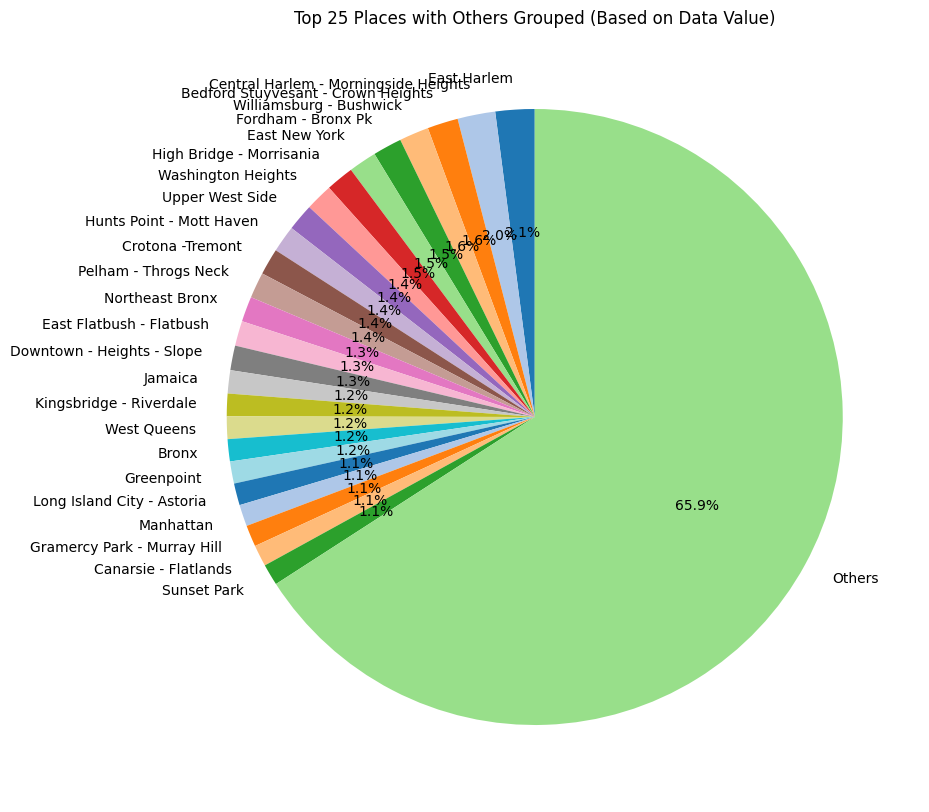

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# File path for the CSV file
file_path = "/content/Air_Quality.csv"

# Load the CSV file
df = pd.read_csv(file_path)

# Set the limit for the number of places to display
limit = 25

# Drop rows where 'Place' is missing
df_clean = df.dropna(subset=['Place'])

# Aggregate data values by place
place_counts = df_clean.groupby('Place')['Data Value'].sum()

# Sort and limit to top 'limit' places
top_places = place_counts.sort_values(ascending=False).head(limit)
others_count = place_counts.iloc[limit:].sum()
top_places['Others'] = others_count

# Plot the pie chart
plt.figure(figsize=(15, 10))
top_places.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.tab20.colors,
    title=f"Top {limit} Places with Others Grouped (Based on Data Value)"
)
plt.ylabel("")  # Remove y-axis label
plt.show()







Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Place', 'Time Period', 'Start_Date',
       'Data Value'],
      dtype='object')


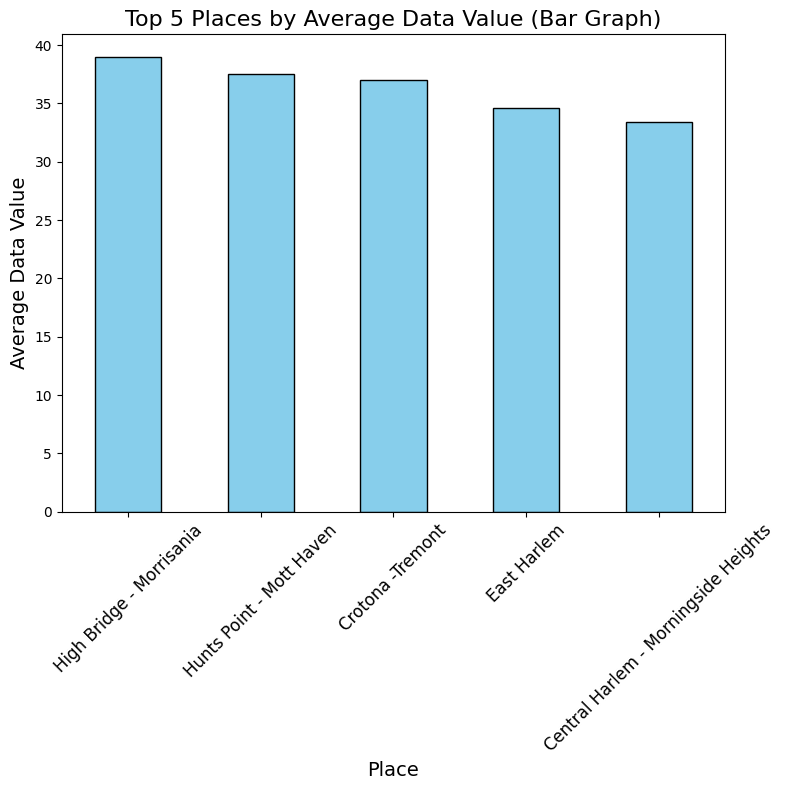

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json

# Load the dataset
file_path = '/content/Air_Quality.csv'  # Adjust this if necessary
df = pd.read_csv(file_path)

# Print columns
print(df.columns)

# Set the limit for the number of places to display
limit = 5 # Change this value as needed

# Check if 'Place' and 'Data Value' columns exist
if 'Place' in df.columns and 'Data Value' in df.columns:
    # Calculate average 'Data Value' for each 'Place'
    place_data = df.groupby('Place')['Data Value'].mean().sort_values(ascending=False).head(limit)

    # Bar graph
    plt.figure(figsize=(8, 8))
    place_data.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Top {limit} Places by Average Data Value (Bar Graph)", fontsize=16)
    plt.xlabel("Place", fontsize=14)
    plt.ylabel("Average Data Value", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()
    plt.show()



Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Place', 'Time Period', 'Start_Date',
       'Data Value'],
      dtype='object')


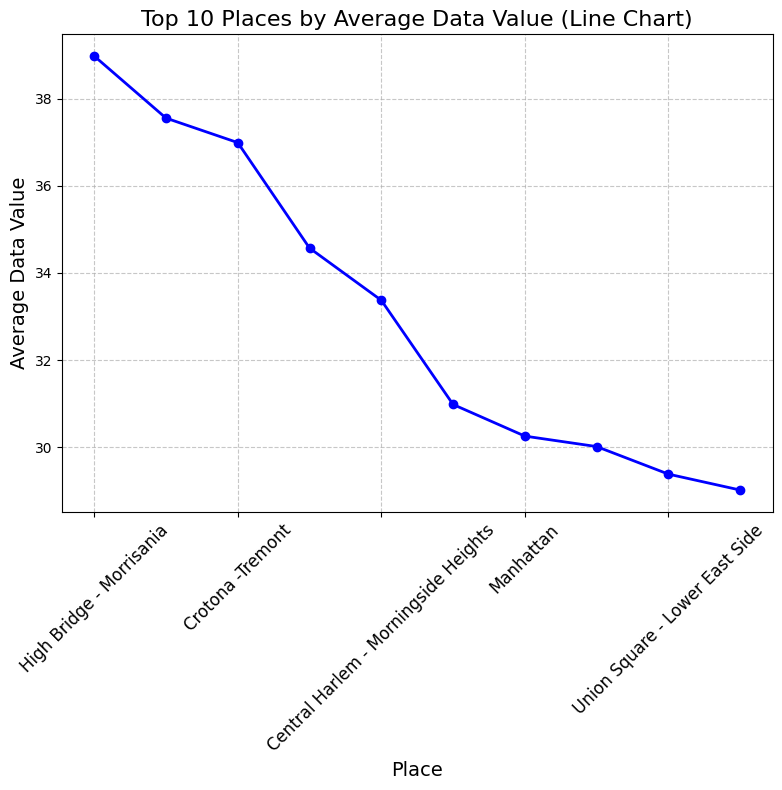

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Air_Quality.csv'  # Update this with the actual file path
df = pd.read_csv(file_path)

# Print columns
print(df.columns)

# Line chart for 'Place' over 'Data Value'
if 'Place' in df.columns and 'Data Value' in df.columns:
    # Calculate average 'Data Value' for each place
    place_data = df.groupby('Place')['Data Value'].mean().sort_values(ascending=False).head(10)  # Top 10 places

    # Line chart
    plt.figure(figsize=(8, 8))
    place_data.plot(kind='line', marker='o', color='blue', linewidth=2)
    plt.title("Top 10 Places by Average Data Value (Line Chart)", fontsize=16)
    plt.xlabel("Place", fontsize=14)
    plt.ylabel("Average Data Value", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Place', 'Time Period', 'Start_Date',
       'Data Value'],
      dtype='object')


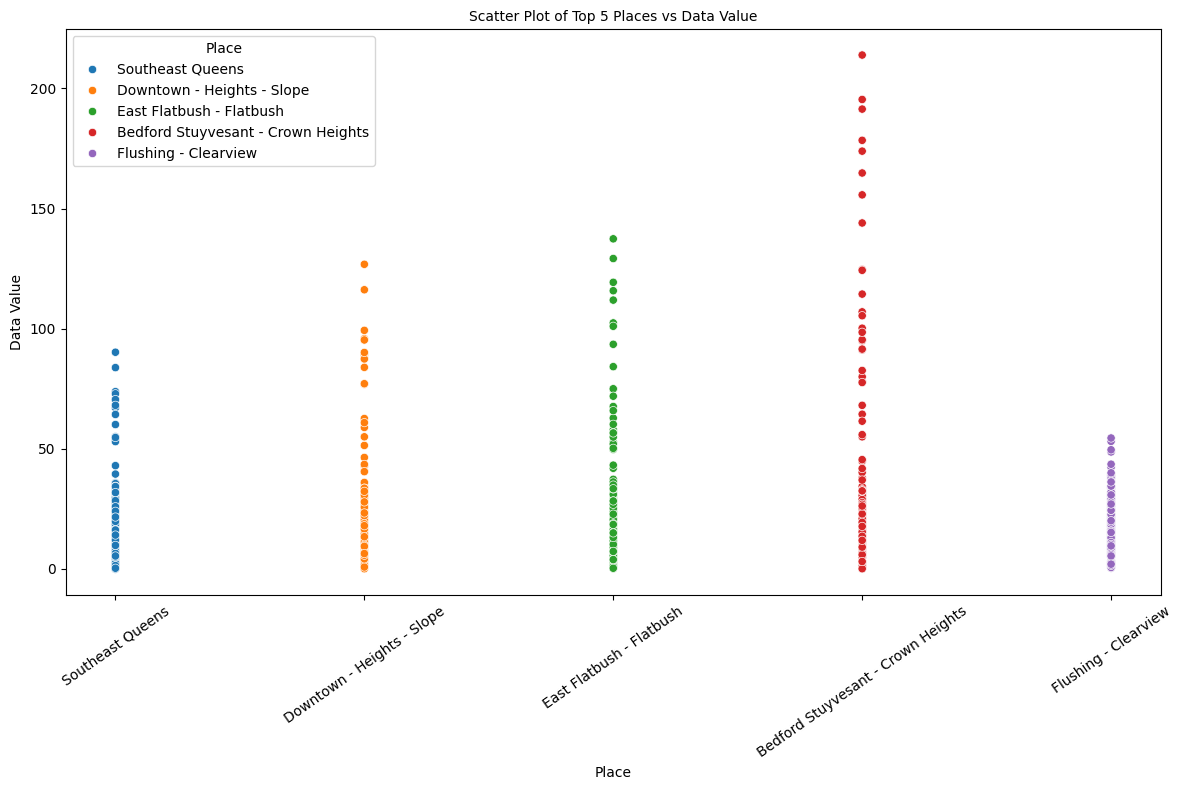

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Air_Quality.csv'  # Update this with the actual file path
df = pd.read_csv(file_path)

# Print columns to check the structure
print(df.columns)

# Set the limit for the number of unique places to display
limit = 5

# Scatter plot for 'Place' over 'Data Value'
if 'Place' in df.columns and 'Data Value' in df.columns:
    # Get the top places by the number of occurrences
    top_places = df['Place'].value_counts().head(limit).index
    filtered_df = df[df['Place'].isin(top_places)]

    # Plotting a scatter plot
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=filtered_df, x='Place', y='Data Value', hue='Place', palette='tab10', marker='o')
    plt.title(f"Scatter Plot of Top {limit} Places vs Data Value", fontsize=10)
    plt.xlabel("Place", fontsize=10)
    plt.ylabel("Data Value", fontsize=10)
    plt.xticks(rotation=35, fontsize=10)
    plt.tight_layout()
    plt.show()



Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Place', 'Time Period', 'Start_Date',
       'Data Value'],
      dtype='object')


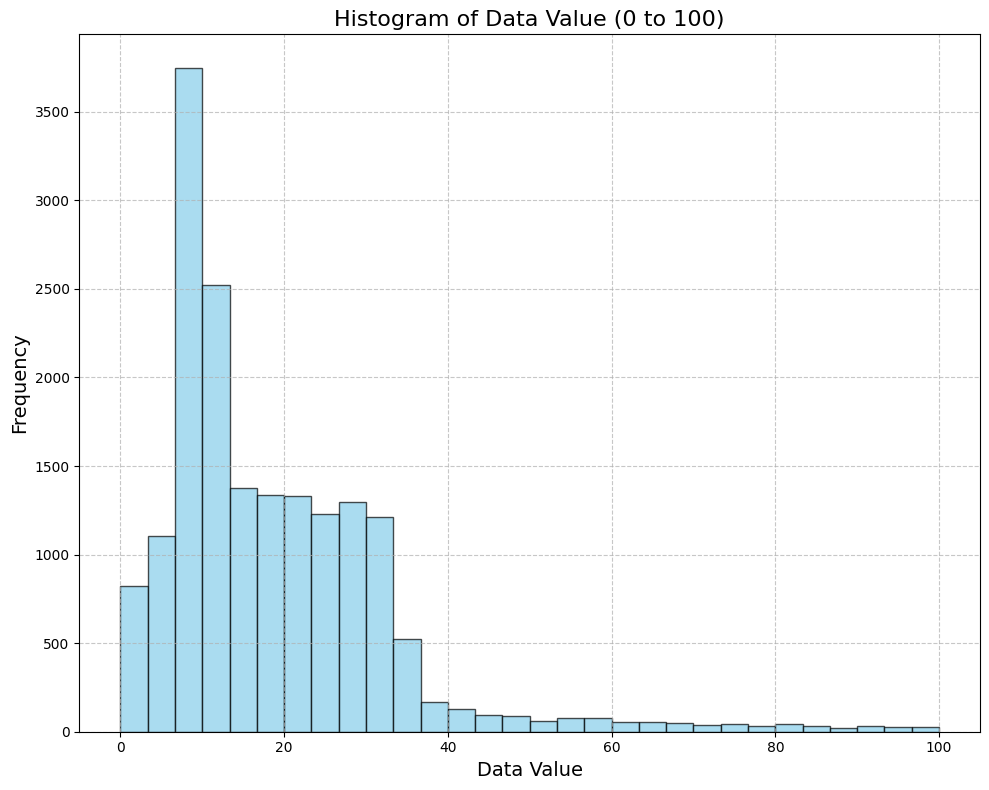

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Air_Quality.csv'  # Update with your dataset's actual path
df = pd.read_csv(file_path)

# Print the columns to verify the dataset structure
print(df.columns)

# Set limits for the 'Data Value'
lower_limit = 0  # Adjust as needed
upper_limit = 100  # Adjust as needed

# Check if 'Data Value' exists in the dataset
if 'Data Value' in df.columns:
    # Filter the data based on the limits
    filtered_data = df[(df['Data Value'] >= lower_limit) & (df['Data Value'] <= upper_limit)]

    # Create a histogram for the filtered 'Data Value' column
    plt.figure(figsize=(10, 8))
    plt.hist(filtered_data['Data Value'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of Data Value ({lower_limit} to {upper_limit})", fontsize=16)
    plt.xlabel("Data Value", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Place', 'Time Period', 'Start_Date',
       'Data Value'],
      dtype='object')


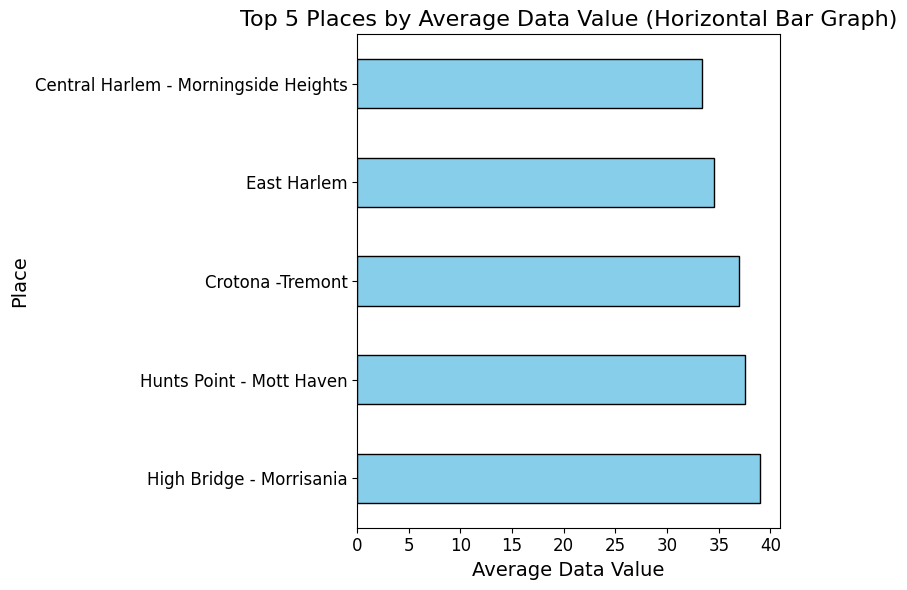

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Air_Quality.csv'  # Adjust this if necessary
df = pd.read_csv(file_path)

# Print columns
print(df.columns)

# Set the limit for the number of places to display
limit = 5  # Change this value as needed

# Check if 'Place' and 'Data Value' columns exist
if 'Place' in df.columns and 'Data Value' in df.columns:
    # Calculate average 'Data Value' for each 'Place'
    place_data = df.groupby('Place')['Data Value'].mean().sort_values(ascending=False).head(limit)

    # Horizontal bar graph
    plt.figure(figsize=(8, 6))  # Adjust figure size if necessary
    place_data.plot(kind='barh', color='skyblue', edgecolor='black')  # Changed to 'barh' for horizontal bars
    plt.title(f"Top {limit} Places by Average Data Value (Horizontal Bar Graph)", fontsize=16)
    plt.xlabel("Average Data Value", fontsize=14)
    plt.ylabel("Place", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Place', 'Time Period', 'Start_Date',
       'Data Value'],
      dtype='object')


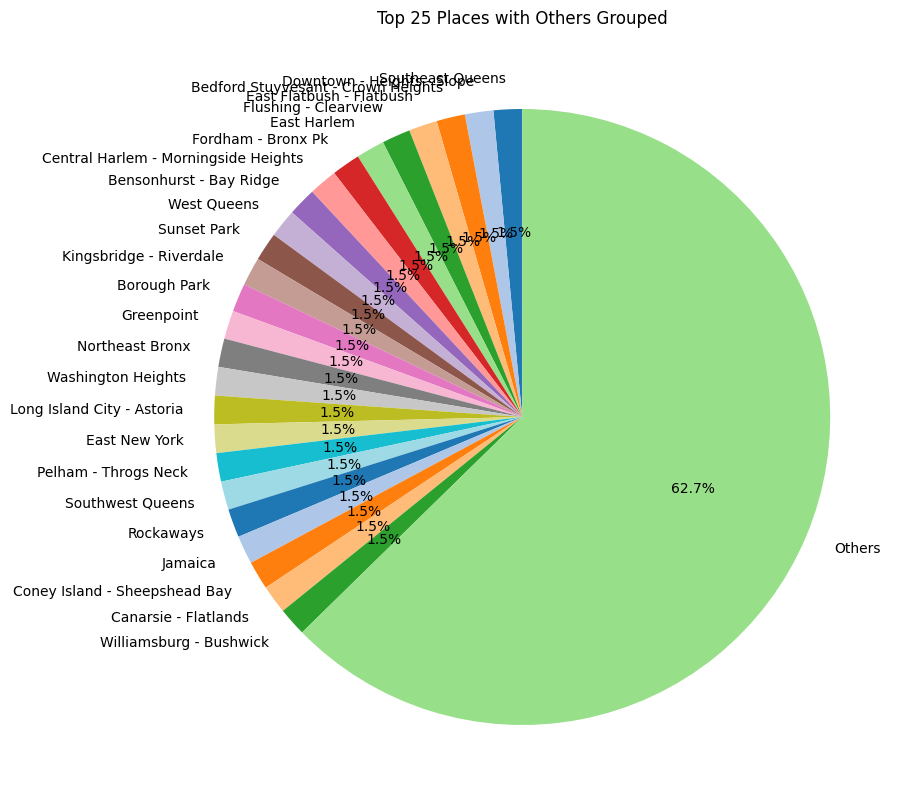

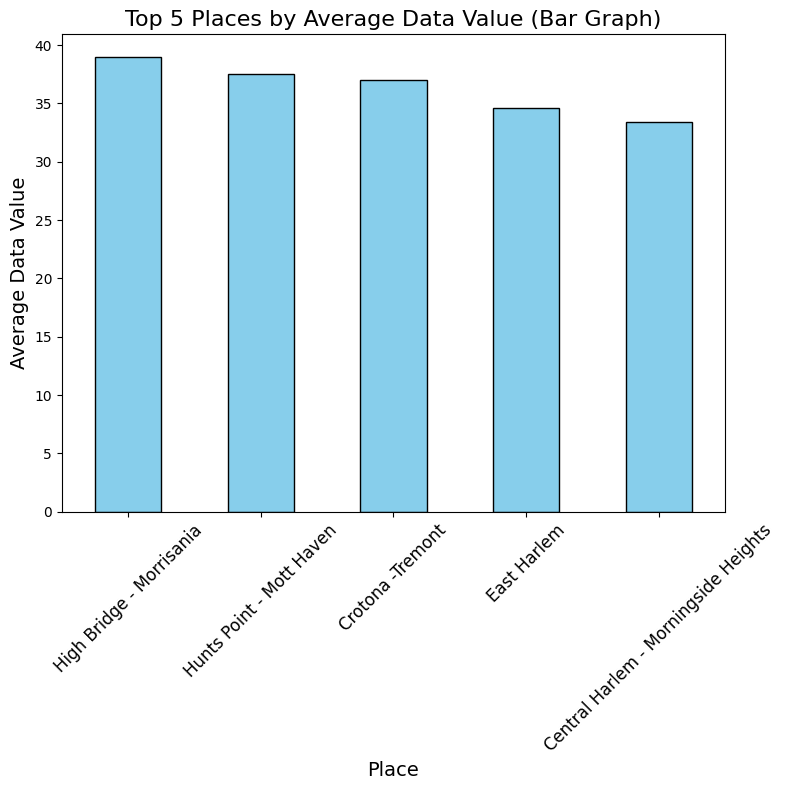

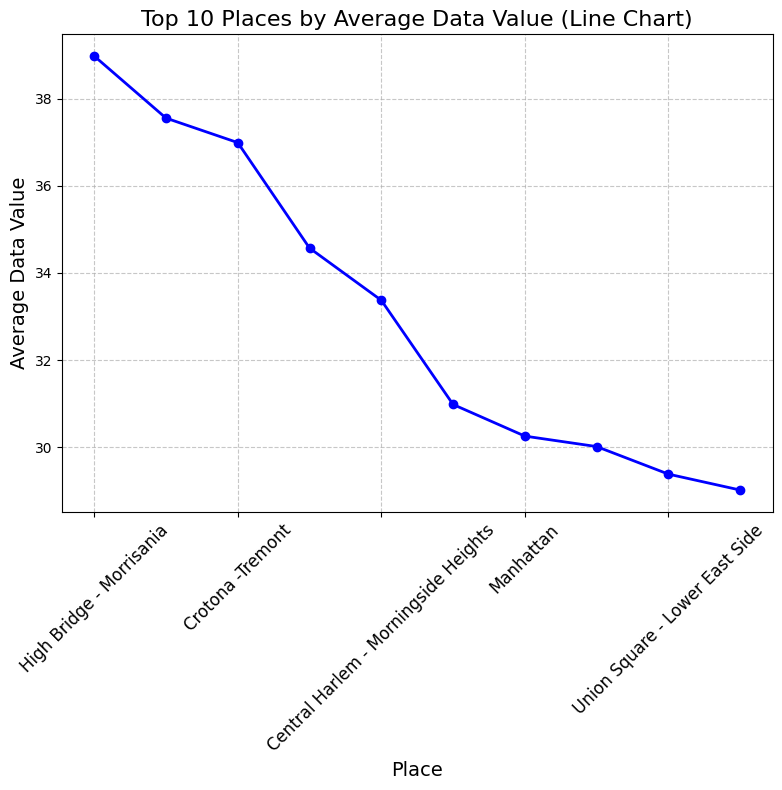

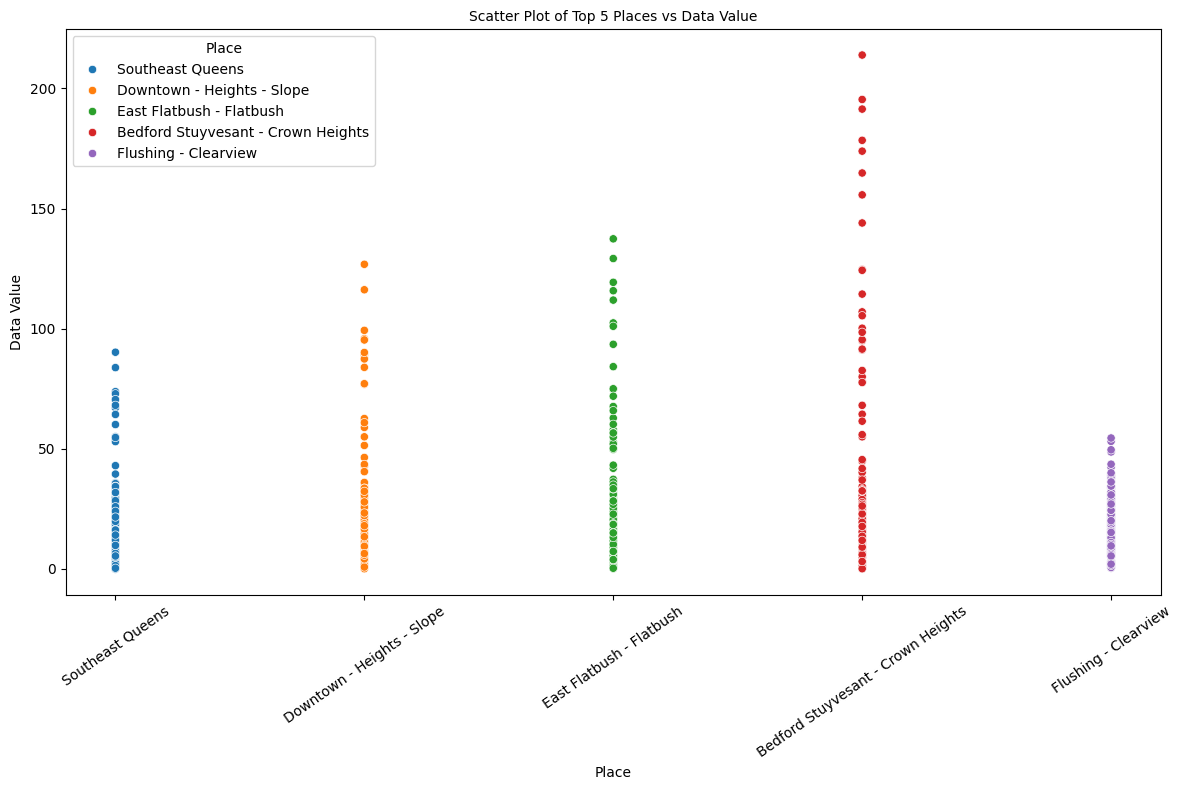

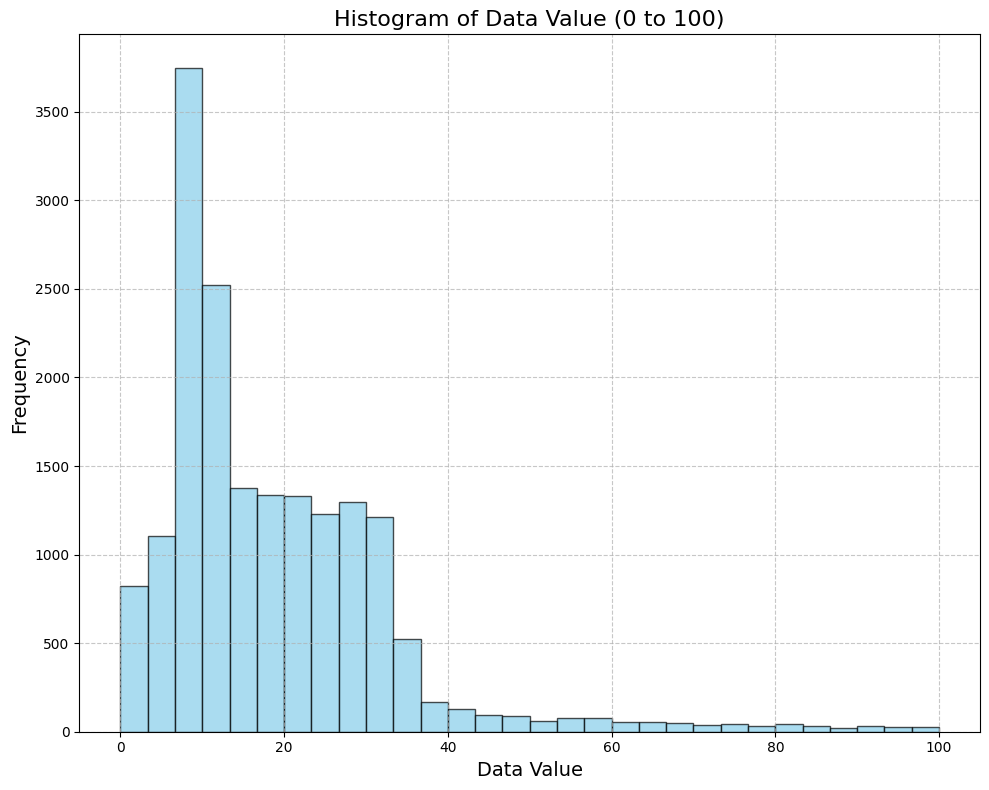

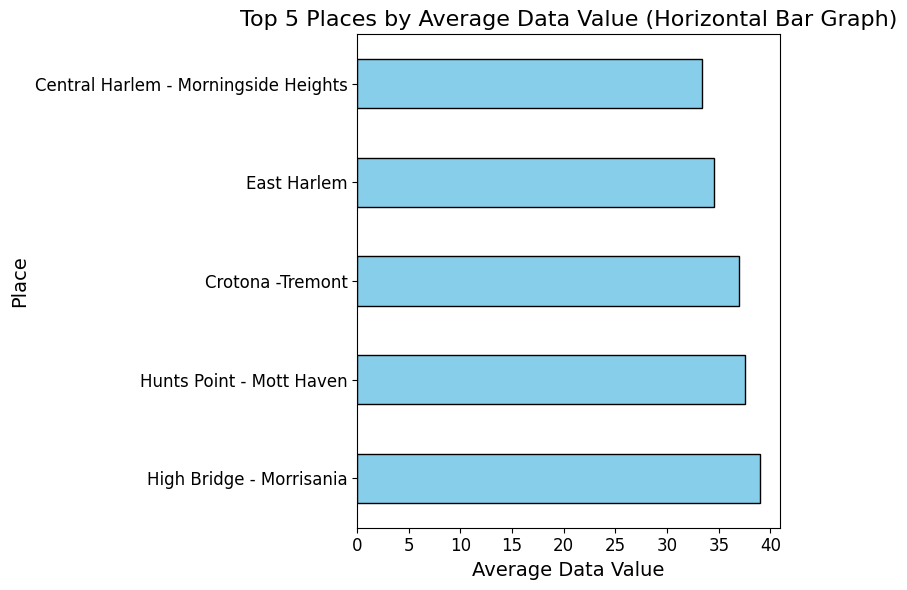

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Air_Quality.csv'  # Update with the actual file path
df = pd.read_csv(file_path)

# Print columns to check the structure
print(df.columns)

# 1. Pie Chart: Top Places with Others Grouped
import pandas as pd
import matplotlib.pyplot as plt

# File path for the CSV file
file_path = "/content/Air_Quality.csv"

# Load the CSV file
df = pd.read_csv(file_path)

if 'Place' in df.columns:
    # Set the limit for the number of places to display
    limit = 25

    # Drop rows where 'Place' is missing
    df_clean = df.dropna(subset=['Place'])

    # Count occurrences of each place
    place_counts = df_clean['Place'].value_counts()

    # Sort and limit to top 'limit' places
    top_places = place_counts.head(limit)
    others_count = place_counts.iloc[limit:].sum()
    top_places['Others'] = others_count

    # Plot the pie chart
    plt.figure(figsize=(15, 10))
    top_places.plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors,
        title=f"Top {limit} Places with Others Grouped"
    )
    plt.ylabel("")  # Remove y-axis label
    plt.show()

# 2. Bar Graph: Top Places by Average Data Value
if 'Place' in df.columns and 'Data Value' in df.columns:
    limit = 5  # Change this value as needed
    place_data = df.groupby('Place')['Data Value'].mean().sort_values(ascending=False).head(limit)

    # Bar graph
    plt.figure(figsize=(8, 8))
    place_data.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Top {limit} Places by Average Data Value (Bar Graph)", fontsize=16)
    plt.xlabel("Place", fontsize=14)
    plt.ylabel("Average Data Value", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()
    plt.show()

# 3. Line Chart: Top 10 Places by Average Data Value
if 'Place' in df.columns and 'Data Value' in df.columns:
    place_data = df.groupby('Place')['Data Value'].mean().sort_values(ascending=False).head(10)

    # Line chart
    plt.figure(figsize=(8, 8))
    place_data.plot(kind='line', marker='o', color='blue', linewidth=2)
    plt.title("Top 10 Places by Average Data Value (Line Chart)", fontsize=16)
    plt.xlabel("Place", fontsize=14)
    plt.ylabel("Average Data Value", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 4. Scatter Plot: Top Places vs Data Value
if 'Place' in df.columns and 'Data Value' in df.columns:
    limit = 5
    top_places = df['Place'].value_counts().head(limit).index
    filtered_df = df[df['Place'].isin(top_places)]

    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=filtered_df, x='Place', y='Data Value', hue='Place', palette='tab10', marker='o')
    plt.title(f"Scatter Plot of Top {limit} Places vs Data Value", fontsize=10)
    plt.xlabel("Place", fontsize=10)
    plt.ylabel("Data Value", fontsize=10)
    plt.xticks(rotation=35, fontsize=10)
    plt.tight_layout()
    plt.show()

# 5. Histogram: Data Value Distribution within Limits
if 'Data Value' in df.columns:
    lower_limit = 0  # Adjust as needed
    upper_limit = 100  # Adjust as needed
    filtered_data = df[(df['Data Value'] >= lower_limit) & (df['Data Value'] <= upper_limit)]

    plt.figure(figsize=(10, 8))
    plt.hist(filtered_data['Data Value'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of Data Value ({lower_limit} to {upper_limit})", fontsize=16)
    plt.xlabel("Data Value", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 6. Horizontal Bar Graph: Top Places by Average Data Value
if 'Place' in df.columns and 'Data Value' in df.columns:
    limit = 5
    place_data = df.groupby('Place')['Data Value'].mean().sort_values(ascending=False).head(limit)

    plt.figure(figsize=(8, 6))
    place_data.plot(kind='barh', color='skyblue', edgecolor='black')
    plt.title(f"Top {limit} Places by Average Data Value (Horizontal Bar Graph)", fontsize=16)
    plt.xlabel("Average Data Value", fontsize=14)
    plt.ylabel("Place", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Load the dataset
file_path = '/content/Air_Quality.csv'  # Update with the actual file path
df = pd.read_csv(file_path)

# Print columns to check the structure
print("Dataset Columns:", df.columns)

# Create a PDF to save all plots
pdf_file_path = "Air_Quality_Analysis.pdf"
with PdfPages(pdf_file_path) as pdf:
    # 1. Pie Chart: Top Places with Others Grouped
    if 'Place' in df.columns:
        limit = 25  # Set the limit for the number of places to display
        place_counts = df['Place'].value_counts()

        # Select the top 'limit' places and group the rest as 'Others'
        top_places = place_counts.head(limit)
        others_count = place_counts[limit:].sum()
        top_places['Others'] = others_count

        # Plot pie chart
        plt.figure(figsize=(10, 10))
        top_places.plot.pie(
            autopct='%1.1f%%',
            title="Top Places with Others Grouped",
            startangle=90,
            colors=plt.cm.tab20.colors
        )
        plt.ylabel("")  # Remove y-axis label
        pdf.savefig()  # Save the current figure to the PDF
        plt.close()

    # 2. Bar Graph: Top Places by Average Data Value
    if 'Place' in df.columns and 'Data Value' in df.columns:
        limit = 5
        place_data = df.groupby('Place')['Data Value'].mean().sort_values(ascending=False).head(limit)

        # Bar graph
        plt.figure(figsize=(8, 8))
        place_data.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f"Top {limit} Places by Average Data Value (Bar Graph)", fontsize=16)
        plt.xlabel("Place", fontsize=14)
        plt.ylabel("Average Data Value", fontsize=14)
        plt.xticks(rotation=45, fontsize=12)
        plt.tight_layout()
        pdf.savefig()
        plt.close()

    # 3. Line Chart: Top 10 Places by Average Data Value
    if 'Place' in df.columns and 'Data Value' in df.columns:
        place_data = df.groupby('Place')['Data Value'].mean().sort_values(ascending=False).head(10)

        # Line chart
        plt.figure(figsize=(8, 8))
        place_data.plot(kind='line', marker='o', color='blue', linewidth=2)
        plt.title("Top 10 Places by Average Data Value (Line Chart)", fontsize=16)
        plt.xlabel("Place", fontsize=14)
        plt.ylabel("Average Data Value", fontsize=14)
        plt.xticks(rotation=45, fontsize=12)
        plt.grid(visible=True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        pdf.savefig()
        plt.close()

    # 4. Scatter Plot: Top Places vs Data Value
    if 'Place' in df.columns and 'Data Value' in df.columns:
        limit = 5
        top_places = df['Place'].value_counts().head(limit).index
        filtered_df = df[df['Place'].isin(top_places)]

        plt.figure(figsize=(12, 8))
        sns.scatterplot(data=filtered_df, x='Place', y='Data Value', hue='Place', palette='tab10', marker='o')
        plt.title(f"Scatter Plot of Top {limit} Places vs Data Value", fontsize=10)
        plt.xlabel("Place", fontsize=10)
        plt.ylabel("Data Value", fontsize=10)
        plt.xticks(rotation=35, fontsize=10)
        plt.tight_layout()
        pdf.savefig()
        plt.close()

    # 5. Histogram: Data Value Distribution within Limits
    if 'Data Value' in df.columns:
        lower_limit = 0  # Adjust as needed
        upper_limit = 100  # Adjust as needed
        filtered_data = df[(df['Data Value'] >= lower_limit) & (df['Data Value'] <= upper_limit)]

        plt.figure(figsize=(10, 8))
        plt.hist(filtered_data['Data Value'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        plt.title(f"Histogram of Data Value ({lower_limit} to {upper_limit})", fontsize=16)
        plt.xlabel("Data Value", fontsize=14)
        plt.ylabel("Frequency", fontsize=14)
        plt.grid(visible=True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        pdf.savefig()
        plt.close()

    # 6. Horizontal Bar Graph: Top Places by Average Data Value
    if 'Place' in df.columns and 'Data Value' in df.columns:
        limit = 5
        place_data = df.groupby('Place')['Data Value'].mean().sort_values(ascending=False).head(limit)

        plt.figure(figsize=(8, 6))
        place_data.plot(kind='barh', color='skyblue', edgecolor='black')
        plt.title(f"Top {limit} Places by Average Data Value (Horizontal Bar Graph)", fontsize=16)
        plt.xlabel("Average Data Value", fontsize=14)
        plt.ylabel("Place", fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()
        pdf.savefig()
        plt.close()

print(f"All plots have been saved to {pdf_file_path}.")



Dataset Columns: Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Place', 'Time Period', 'Start_Date',
       'Data Value'],
      dtype='object')
All plots have been saved to Air_Quality_Analysis.pdf.
